# Import libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style('darkgrid')

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "mathptmx",
#     'font.size': 14,
# })

data_path = 'data/'

# Load datasets

In [2]:
learning_df = pd.read_csv(
    data_path+'2023-11-04_151748_learning curve.csv',
    names = ['iteration_number', 'total_cost'],
    skiprows=1,
)
# learning_df.rename(['iteration_number', 'total_cost'])
learning_df

,iteration_number,total_cost
0,1,55.192885
1,2,50.775918
2,3,46.847239
3,4,44.783359
4,5,42.308411
...,...,...
645,646,1.795004
646,647,1.806237
647,648,1.764056
648,649,1.821222


In [3]:
iteration_names_dict = {
    "before_peak": [475, "2023-11-04_143026"],
    "after_peak": [550, "2023-11-04_150858"],
    "last_plot": [650, "2023-11-04_151748"],
}
print(iteration_names_dict)

iterations_lt = [value[0] for value in iteration_names_dict.values()]
print(iterations_lt)

{'before_peak': [475, '2023-11-04_143026'], 'after_peak': [550, '2023-11-04_150858'], 'last_plot': [650, '2023-11-04_151748']}
[475, 550, 650]


Let us combine all actions and observations

In [4]:
actions_name = "_last actions.csv"
observations_name = "_last observations.csv"

iter_obs_actions_df = []
for key in iteration_names_dict:
    iteration_num, log_name = iteration_names_dict[key]
    # Get actions
    iter_obs_actions_df.append(
        pd.read_csv(
            data_path+log_name+actions_name,
            names = ['step_number', f'action_{iteration_num}'],
            skiprows=1,
        )
    )
    # Get observations
    iter_obs_actions_df.append(
        pd.read_csv(
            data_path+log_name+observations_name,
            names = ['step_number', f'jet_length_{iteration_num}', f'jet_velocity_{iteration_num}'],
            skiprows=1,
        )
    )
    
# Concatenate columns and drop duplicated step_number
df = pd.concat(iter_obs_actions_df, axis='columns', )
df = df.loc[:,~df.columns.duplicated()].copy()

# Add time
df['time'] = df['step_number'] * 0.1

# Recalculate velocity to rel length/ms
for iter in iterations_lt:
    df[f'jet_velocity_{iter}'] *= 10
df

,step_number,action_475,jet_length_475,jet_velocity_475,action_550,jet_length_550,jet_velocity_550,action_650,jet_length_650,jet_velocity_650,time
0,0,29.495943,0.000000,0.000000,30.237500,0.000000,0.000000,33.699806,0.000000,0.000000,0.0
1,1,31.141535,0.014349,0.286040,33.274390,0.014349,0.286040,35.893368,0.014349,0.286040,0.1
2,2,32.645508,0.057162,0.569755,34.046940,0.057162,0.569755,35.294613,0.057162,0.569755,0.2
3,3,30.770410,0.114139,0.569754,32.201042,0.114139,0.569754,35.702854,0.114139,0.569754,0.3
4,4,30.519520,0.171117,0.569755,31.898155,0.171117,0.569755,34.985910,0.171117,0.569755,0.4
...,...,...,...,...,...,...,...,...,...,...,...
56,56,-1.173493,1.045083,0.006341,-4.793817,0.827959,0.002974,-4.945426,1.013584,-0.003173,5.6
57,57,-0.000915,1.045060,0.002249,-4.064499,0.827943,0.002582,-4.797472,1.013592,0.000047,5.7
58,58,-0.763467,1.045064,-0.003331,-3.429769,0.827936,0.000093,-5.115873,1.013583,0.003071,5.8
59,59,-1.195780,1.045091,-0.005817,-4.584514,0.827943,-0.002374,-5.179453,1.013564,0.003451,5.9


In [5]:
df.describe()

,step_number,action_475,jet_length_475,jet_velocity_475,action_550,jet_length_550,jet_velocity_550,action_650,jet_length_650,jet_velocity_650,time
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,30.000000,7.684314,0.857847,0.173963,3.875511,0.708403,0.137990,5.598371,0.840393,0.167964,3.000000
std,17.752934,12.003682,0.320829,0.246634,13.702892,0.240206,0.235836,15.849239,0.310464,0.253319,1.775293
min,0.000000,-1.346665,0.000000,-0.011251,-5.055385,0.000000,-0.011852,-6.018357,0.000000,-0.026616,0.000000
25%,15.000000,-0.590036,0.795617,-0.002068,-4.314414,0.778512,-0.002086,-4.945426,0.797868,-0.001585,1.500000
50%,30.000000,-0.018727,1.042081,0.008764,-3.858596,0.827936,0.002808,-4.704597,1.013543,0.003451,3.000000
75%,45.000000,18.622149,1.045047,0.481385,9.914762,0.827964,0.283737,20.375967,1.013582,0.542133,4.500000
max,60.000000,32.645508,1.045146,0.569755,34.046940,0.828006,0.569755,35.893368,1.013684,0.569755,6.000000


## Plot learning curve

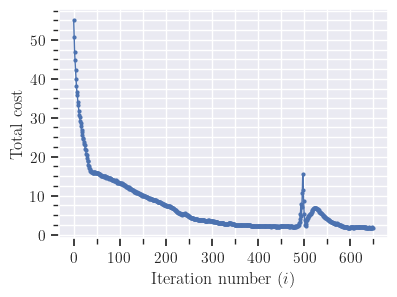

In [6]:
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "mathptmx",
    "font.size": 16,
})

fig, ax = plt.subplots(1, 1, figsize=(4,3))

# PLOT LEARNING CURVE
ax.set_ylabel("Total cost")
# set grid
ax.set_xticks(np.arange(0, 710, 50), minor=True)
ax.set_xticks(np.arange(0, 710, 100))

ax.set_yticks(np.arange(0, 65, 2.5), minor=True)
ax.set_yticks(np.arange(0, 65, 10))

ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which='minor')
    
# plot learning curve
data = learning_df['total_cost']
na_mask = data.isna()
not_na_mask = ~na_mask
interpolated_values = data.interpolate()
interpolated_values[not_na_mask] = None

data.plot(marker="o", markersize=2, linewidth=1.0, ax=ax)
interpolated_values.plot(linestyle="--", linewidth=2.0, ax=ax)

ax.set_xlabel("Iteration number $(i)$")

plt.tight_layout(pad=0.5)
plt.savefig("learning_curve.pdf", dpi=400)
plt.show();
# ax.set_xlabel("$i$");

## Simulation results

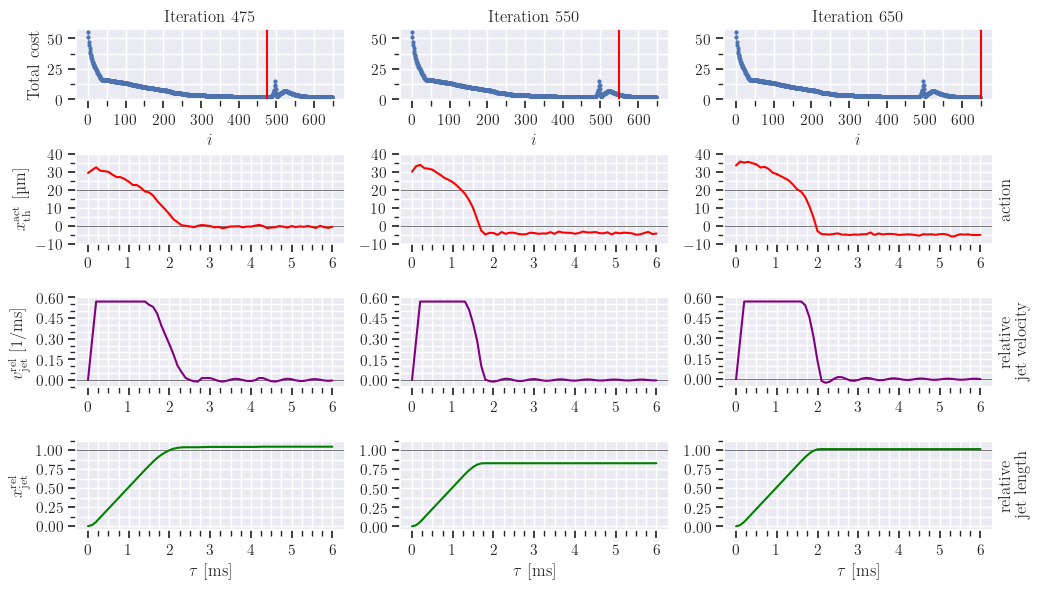

In [8]:
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "mathptmx",
    "font.size": 10,
})

fig, axes = plt.subplots(4, 3, figsize=(10.5,6), gridspec_kw={'height_ratios': [0.8, 1, 1, 1]})

# PLOT LEARNING CURVE
axes[0,0].set_ylabel("Total cost")
for iter, ax in zip(iterations_lt, axes[0,:].flat):
    # set grid
    ax.set_xticks(np.arange(0, 710, 50), minor=True)
    ax.set_xticks(np.arange(0, 710, 100))
    
    ax.set_yticks(np.arange(0, 65, 12.5), minor=True)
    ax.set_yticks(np.arange(0, 65, 25))
    
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    
    # plot learning curve
    data = learning_df['total_cost']
    na_mask = data.isna()
    not_na_mask = ~na_mask
    interpolated_values = data.interpolate()
    interpolated_values[not_na_mask] = None
    
    data.plot(marker="o", markersize=2, linewidth=0.5, ax=ax)
    interpolated_values.plot(linestyle="--", ax=ax)
    ax.axvline(iter, color='red')

    ax.set_title(f"Iteration {iter}")
    # ax.set_xlabel("Iteration number $(i)$")
    ax.set_xlabel("$i$")
    
    # ax.legend().set_visible(False)
    
# PLOT ACTIONS
for iter, ax in zip(iterations_lt, axes[1,:].flat):
    ax.axhline(0, color='black', linewidth=0.5, alpha=0.75)
    ax.axhline(20, color='black', linewidth=0.5, alpha=0.75)
    
    sns.lineplot(df, x='time', y=f'action_{iter}', color='red', ax=ax)
    
    ax.set_xticks(np.linspace(0, 6, 25), minor=True)
    ax.set_xticks(np.linspace(0, 6, 7))
    
    ax.set_yticks(np.arange(-10, 45, 5), minor=True)
    ax.set_yticks(np.arange(-10, 45, 10))
    
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    
    
    ax.set_ylabel(r"$x^\mathrm{act}_\mathrm{th}$ [µm]")
    ax.set_xlabel("")
    
    # ax.legend().set_visible(False)

# PLOT JET VELOCITIES
for iter, ax in zip(iterations_lt, axes[2,:].flat):
    
    ax.axhline(0, color='black', linewidth=0.5, alpha=0.75)
    
    sns.lineplot(df, x='time', y=f'jet_velocity_{iter}', color='purple', ax=ax)
    
    ax.set_xticks(np.linspace(0, 6, 25), minor=True)
    ax.set_xticks(np.linspace(0, 6, 7))
    
    ax.set_yticks(np.linspace(-0.05, 0.60, 14), minor=True)
    ax.set_yticks(np.linspace(0, 0.6, 5))
    
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    
    
    ax.set_ylabel(r"$v^\mathrm{rel}_\mathrm{jet}~[1/\mathrm{ms}]$")
    ax.set_xlabel("")
    
    # ax.legend().set_visible(False)

# PLOT JET LENGTHS
for iter, ax in zip(iterations_lt, axes[3,:].flat):
    ax.axhline(1.0, color='black', linewidth=0.5, alpha=0.75)
    
    sns.lineplot(df, x='time', y=f'jet_length_{iter}', color='green', ax=ax)
    
    ax.set_xticks(np.linspace(0, 6, 25), minor=True)
    ax.set_xticks(np.linspace(0, 6, 7))
    
    ax.set_yticks(np.arange(0, 1.2, 0.125), minor=True)
    ax.set_yticks(np.linspace(0, 1.0, 5))
    
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    
    
    ax.set_ylabel(r"$x^\mathrm{rel}_\mathrm{jet}$")
    ax.set_xlabel(r"$\tau$ [ms]")
    
# axes[3,2].legend().set_visible(False)

# Drop y-labels for inside plots
for ax in axes[:,1:].flat:
    ax.set_ylabel("")
# Drop x-labels for obs-actions
for ax in axes[1:-1,:].flat:
    ax.set_xlabel("")
    
axes[1,-1].yaxis.set_label_position("right")
axes[1,-1].set_ylabel('action')

axes[2,-1].yaxis.set_label_position("right")
axes[2,-1].set_ylabel('relative\n jet velocity')

axes[3,-1].yaxis.set_label_position("right")
axes[3,-1].set_ylabel('relative\n jet length')

plt.tight_layout(h_pad=0.1)
plt.savefig("simulation_results.pdf", dpi=400)